In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd

In [2]:
df = pd.read_csv('../data/new_classifier_data.csv', index_col=0)
df

,id,title,area,interpretability,doi,source,working_doi,abstract,embedding
0,187,Probabilistic FastText for Multi-Sense Word Em...,Word Semantics,NaN,10.18653/v1/P18-1001,ACL2018,True,"We introduce Probabilistic FastText, a new mod...",[-1.21772945e+00 -8.94728750e-02 1.95027217e-...
1,1520,A La Carte Embedding: Cheap but Effective Indu...,Word Semantics,NaN,10.18653/v1/P18-1002,ACL2018,True,"Motivations like domain adaptation, transfer l...",[-0.9963372 -0.686948 -0.05514041 -1.214319...
2,707,Unsupervised Learning of Distributional Relati...,Word Semantics,NaN,10.18653/v1/P18-1003,ACL2018,True,Word embedding models such as GloVe rely on co...,[-8.49694252e-01 6.30098805e-02 -5.90695515e-...
3,1553,Explicit Retrofitting of Distributional Word V...,Word Semantics,NaN,10.18653/v1/P18-1004,ACL2018,True,Semantic specialization of distributional word...,[-9.71618176e-01 -2.10295558e-01 -1.79292485e-...
4,76,Unsupervised Neural Machine Translation with W...,Machine Translation,NaN,10.18653/v1/P18-1005,ACL2018,True,Unsupervised neural machine translation (NMT) ...,[-2.98003018e-01 -1.73942789e-01 -4.82958525e-...
...,...,...,...,...,...,...,...,...,...
9019,NaN,Neural Machine Translation with Monolingual Tr...,Machine Translation and Multilinguality,False,10.18653/v1/2021.acl-long.567,ACL2021,True,Prior work has proved that Translation Memory ...,[-3.17639172e-01 -1.05662435e-01 -5.07059693e-...
9020,NaN,Intrinsic Dimensionality Explains the Effectiv...,Interpretability and Analysis of Models for NLP,True,10.18653/v1/2021.acl-long.568,ACL2021,True,Although pretrained language models can be fin...,[-1.55334979e-01 -9.61713135e-01 -4.43367511e-...
9021,NaN,UnNatural Language Inference,"Semantics: Sentence-level Semantics, Textual I...",False,10.18653/v1/2021.acl-long.569,ACL2021,True,Recent investigations into the inner-workings ...,[ 2.62543559e-01 4.60807562e-01 -3.22713777e-...
9022,NaN,Including Signed Languages in Natural Language...,Theme,False,10.18653/v1/2021.acl-long.570,ACL2021,True,Signed languages are the primary means of comm...,[-1.30521685e-01 1.05039132e+00 -1.00475624e-...


In [3]:
df = df[df['interpretability'].notna()]
df

,id,title,area,interpretability,doi,source,working_doi,abstract,embedding
401,main.8,Large Scale Multi-Actor Generative Dialog Mode...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.8,ACL2020,True,Non-goal oriented dialog agents (i.e. chatbots...,[-5.58118939e-01 -1.25368834e-01 -6.33979887e-...
402,main.52,CDL: Curriculum Dual Learning for Emotion-Cont...,Dialogue and Interactive Systems,False,10.18653/v1/2020.acl-main.52,ACL2020,True,Emotion-controllable response generation is an...,[-1.12784958e+00 -5.22979379e-01 5.63119724e-...
403,main.46,Emergence of Syntax Needs Minimal Supervision,Theory and Formalism in NLP (Linguistic and Ma...,False,10.18653/v1/2020.acl-main.46,ACL2020,True,This paper is a theoretical contribution to th...,[ 2.61768043e-01 8.10616314e-01 2.74266422e-...
404,main.359,Selecting Backtranslated Data from Multiple So...,Machine Translation,False,10.18653/v1/2020.acl-main.359,ACL2020,True,Machine translation (MT) has benefited from us...,[-4.39277172e-01 1.06740630e+00 8.58952925e-...
405,main.417,ParaCrawl: Web-Scale Acquisition of Parallel C...,Resources and Evaluation,False,10.18653/v1/2020.acl-main.417,ACL2020,True,We report on methods to create the largest pub...,[-3.59388590e-01 3.36527884e-01 -2.65376344e-...
...,...,...,...,...,...,...,...,...,...
9019,NaN,Neural Machine Translation with Monolingual Tr...,Machine Translation and Multilinguality,False,10.18653/v1/2021.acl-long.567,ACL2021,True,Prior work has proved that Translation Memory ...,[-3.17639172e-01 -1.05662435e-01 -5.07059693e-...
9020,NaN,Intrinsic Dimensionality Explains the Effectiv...,Interpretability and Analysis of Models for NLP,True,10.18653/v1/2021.acl-long.568,ACL2021,True,Although pretrained language models can be fin...,[-1.55334979e-01 -9.61713135e-01 -4.43367511e-...
9021,NaN,UnNatural Language Inference,"Semantics: Sentence-level Semantics, Textual I...",False,10.18653/v1/2021.acl-long.569,ACL2021,True,Recent investigations into the inner-workings ...,[ 2.62543559e-01 4.60807562e-01 -3.22713777e-...
9022,NaN,Including Signed Languages in Natural Language...,Theme,False,10.18653/v1/2021.acl-long.570,ACL2021,True,Signed languages are the primary means of comm...,[-1.30521685e-01 1.05039132e+00 -1.00475624e-...


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch

SEED = 2024
SPLIT = 0.2

X = np.stack(df['embedding'].values)
X = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X])

y = df['interpretability'].values
y = torch.tensor([1 if label else 0 for label in y], dtype=torch.long)

indices = np.arange(len(df))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df.iloc[train_indices], df.iloc[test_indices]

In [5]:
# we are augmenting the test data with blackboxnlp papers
blackbox_df = pd.read_csv('../data/blackbox_papers.csv', index_col=0)

X_blackbox = np.stack(blackbox_df['embedding'].values) 
X_blackbox = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X_blackbox])
y_blackbox = blackbox_df['interpretability'].values
y_blackbox = torch.tensor([1 if label else 0 for label in y_blackbox], dtype=torch.long)
X_augmented_train = torch.cat((X_train, X_blackbox), dim=0)
y_augmented_train = torch.cat((y_train, y_blackbox), dim=0)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.softmax(out, dim=-1)
        return out


In [49]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = X_train.shape[1]

In [50]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import torch

train_dataset = TensorDataset(X_augmented_train, y_augmented_train)

class_sample_count = np.array([len(np.where(y_augmented_train == t)[0]) for t in np.unique(y_augmented_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_augmented_train])

samples_weight = torch.from_numpy(samples_weight)
samples_weight = samples_weight.double()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.98it/s]


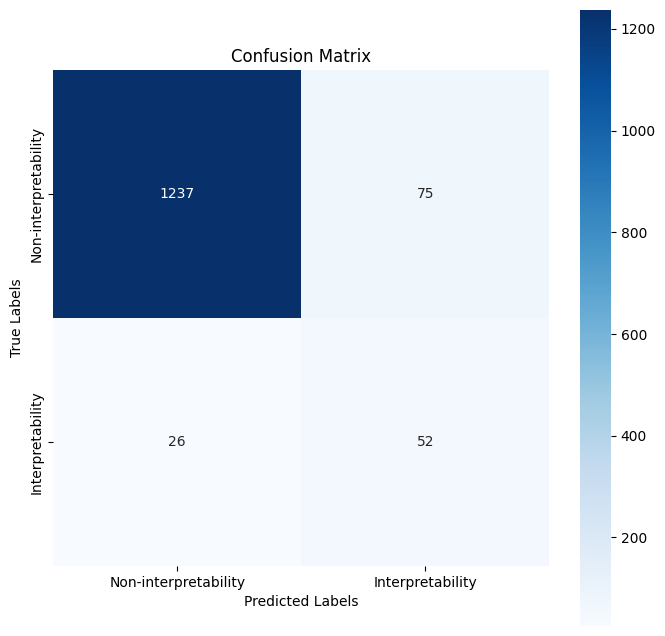

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 100

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()


In [31]:
KEYWORDS = ['interpretability', 'interpretable', 'dimension', 'subspace', 'inner workings', 'circuit', 'probe', 'probing', 'counterfactual', 'attribution', 'subnetwork', 'intrinsic', 'explanation', 'factual', 'causal', 'role of ', 'why', 'encode', 'underlying', 'explainable', 'shortcut', 'encodings']
# Removed keywords (too many false positives): adversarial, representation, analysis, interpret, projection, interpretation, understand, space, mechanism, structure, understanding

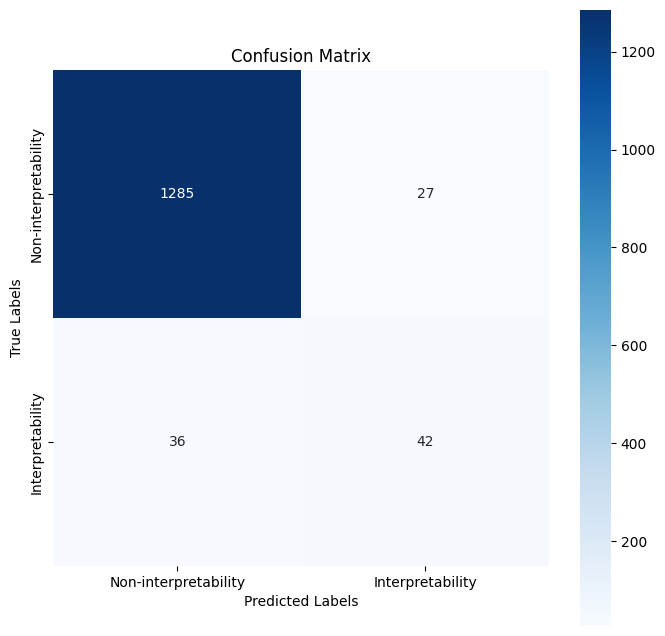

In [54]:
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        x = row['embedding']
        vector = torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32)
        output = model(vector)
        pred = torch.argmax(output)
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])
        y_pred.append((pred and has_keyword))
        y_true.append(int(row['interpretability']))

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()

In [55]:
model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        x = row['embedding']
        vector = torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32)
        output = model(vector)
        pred = torch.argmax(output)
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])

        if (pred and has_keyword) and not row['interpretability']:
            print(row['title'])
            print(row['abstract'])
            print()
            print('Correct: ')
            print('-' * 20 + '\n')

How Does Selective Mechanism Improve Self-Attention Networks?
Self-attention networks (SANs) with selective mechanism has produced substantial improvements in various NLP tasks by concentrating on a subset of input words. However, the underlying reasons for their strong performance have not been well explained. In this paper, we bridge the gap by assessing the strengths of selective SANs (SSANs), which are implemented with a flexible and universal Gumbel-Softmax. Experimental results on several representative NLP tasks, including natural language inference, semantic role labelling, and machine translation, show that SSANs consistently outperform the standard SANs. Through well-designed probing experiments, we empirically validate that the improvement of SSANs can be attributed in part to mitigating two commonly-cited weaknesses of SANs: word order encoding and structure modeling. Specifically, the selective mechanism improves SANs by paying more attention to content words that contribu

In [58]:
torch.save(model, './classifier-weights.pt')